# Python Exploratory Data Analysis - Marcus Anthony Allen

In [1]:
# Import relevant libraries
 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# read csv file to pandas dataframe

df = pd.read_csv('airbnb.csv')

# delineation of dataframe's shape and data types

print(df.shape)
print(df.dtypes)

(48895, 16)
id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object


In [3]:
# preview the dataframe

df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


I see some missing values here in the last_review and reviews_per_month columns for listing 3647. I'm not worried, because this listing has no reviews, thus these columns should be blank. It's important to identify blanks though and it's our next step. This dataset is curated, used so much, and I'm familiar with it so I'm not overly concerned about data quaility -- though I take the necesaary precautions.

In [4]:
# Identify all missing values

df.isna().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

As we can see, there are no issues with missing values.

In [5]:
# Statisical attributes of what everyone cares about (i.e. Price)

df.price.describe()

count    48895.000000
mean       152.720687
std        240.154170
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

Clearly there are extreme values in price. This will affect any visualization of price we do later on, but we'll get there when we get there.

In [6]:
# Isolate distinct values from key columns
# Will prove to be helpful throughout the process for iteration

roomtypes = df['room_type'].unique()
boroughs = df['neighbourhood_group'].unique()
ngbhoods = df['neighbourhood'].unique()

# There are a ton of neighborhoods in NYC; let's see how many are here

len(ngbhoods)

221

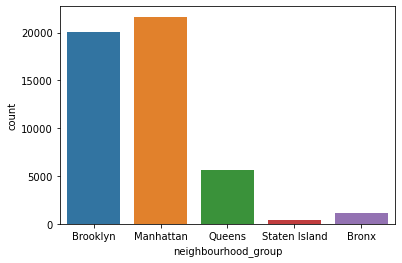

In [7]:
# Plot showing the number of listings by borough

sns.countplot(df['neighbourhood_group'])

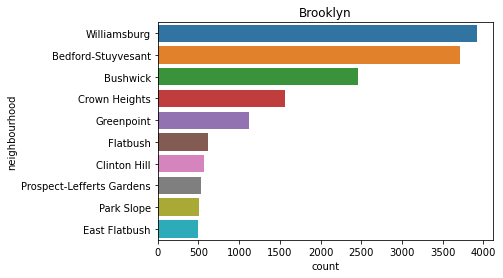

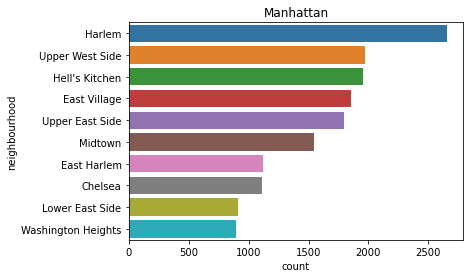

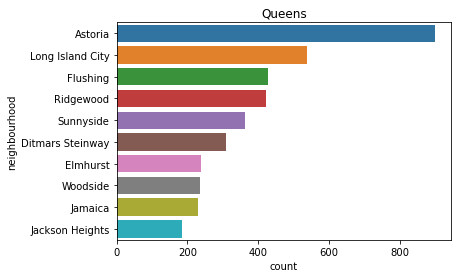

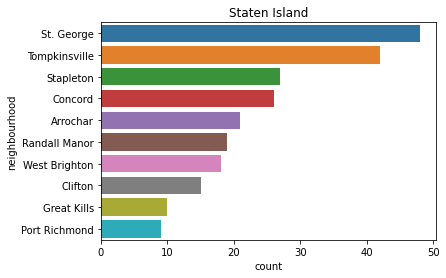

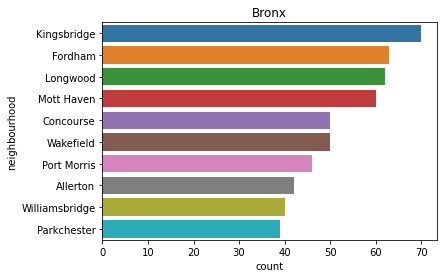

In [8]:
# Plot Top 10 neighbourhoods, by count, for each borough

for i in boroughs:
    plt.figure()
    sns.countplot(y='neighbourhood', data=df[df.neighbourhood_group == i], order=df[df.neighbourhood_group == i].neighbourhood.value_counts().iloc[:10].index)
    plt.title(i)

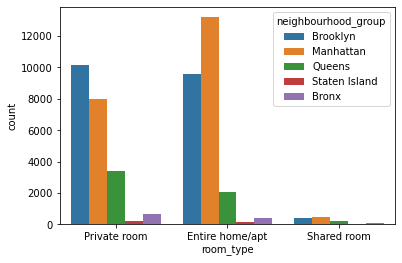

In [9]:
# Plot showing the number of listings in each room type, by borough

sns.countplot(x='room_type', hue='neighbourhood_group', data=df)

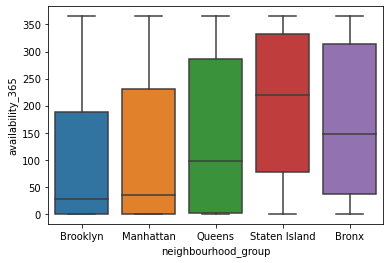

In [10]:
# How does the Borough affect availabilty?

sns.boxplot(x='neighbourhood_group',y='availability_365',data=df)

So Brooklyn has less availabilty than Manhattan. Interesting.

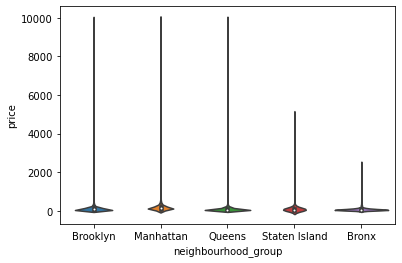

In [11]:
# How about price?

sns.violinplot(x='neighbourhood_group',y='price',data=df)

There are those pesky, extreme values messing with the plot.

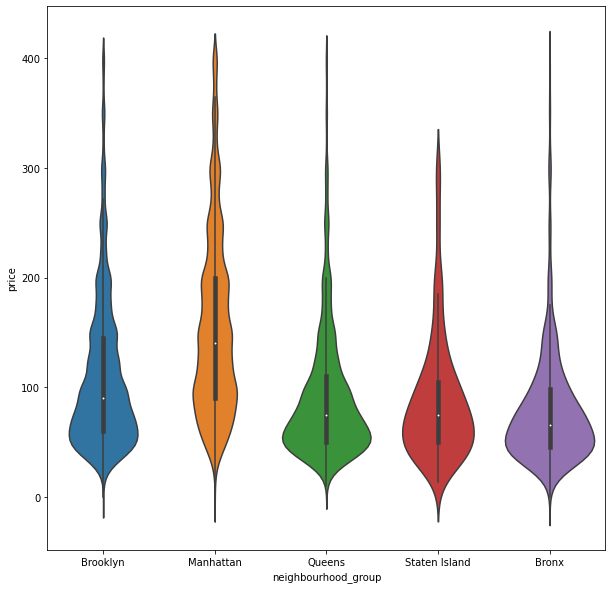

In [12]:
# Plot while removing extreme values

df_price = df[df.price <= 400]
plt.figure(figsize=(10,10))
sns.violinplot(x='neighbourhood_group',y='price',data=df_price)

Brooklyn has less availabilty, on average, yet Manhattan does command a higher price per night. 

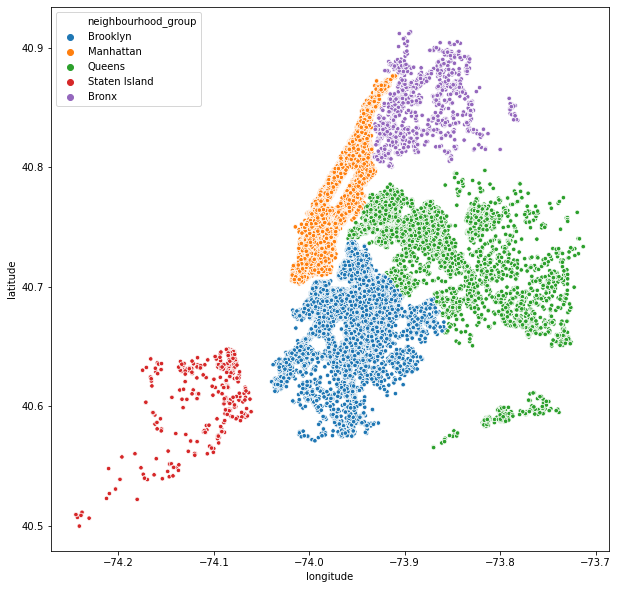

In [13]:
# Basic Seaborn plot with coloration based upon borough

plt.figure(figsize=(10,10))
sns.scatterplot(x='longitude', y='latitude', hue='neighbourhood_group',s=20, data=df)

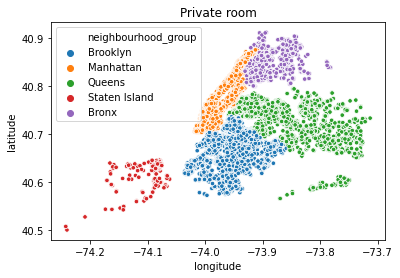

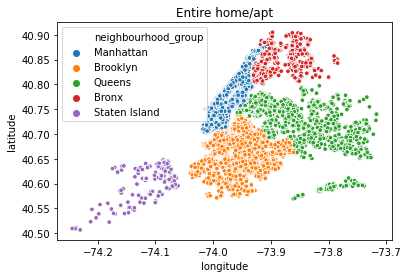

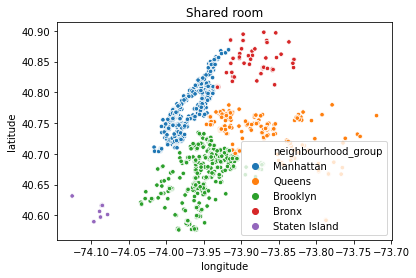

In [14]:
# Create dictionary subsetting the data based upon room type

output_room = {r: df[df['room_type'] == r] for r in roomtypes}

# Creating a plot for each room type highlighting boroughs

for z in output_room:
    plt.figure()
    sns.scatterplot(x='longitude', y='latitude', hue='neighbourhood_group',s=20, data=output_room[z])
    plt.title(z)
    


<Figure size 432x288 with 0 Axes>

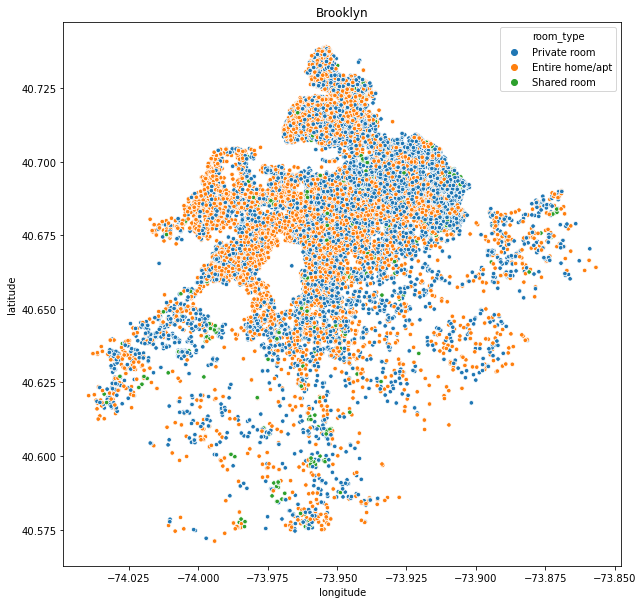

<Figure size 432x288 with 0 Axes>

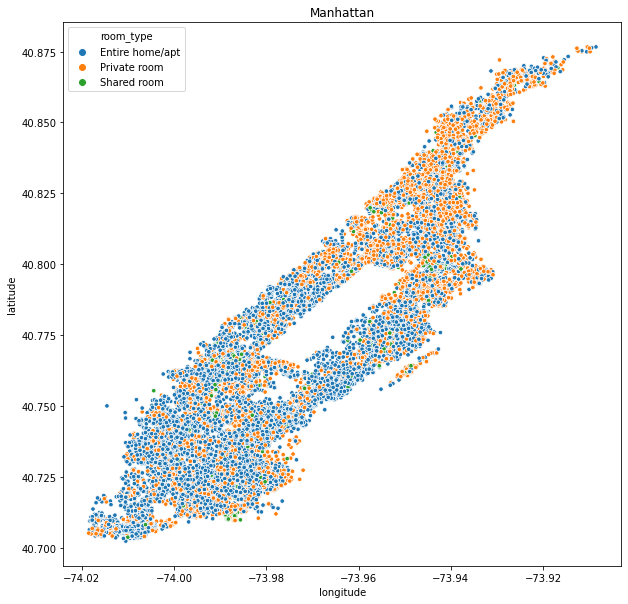

<Figure size 432x288 with 0 Axes>

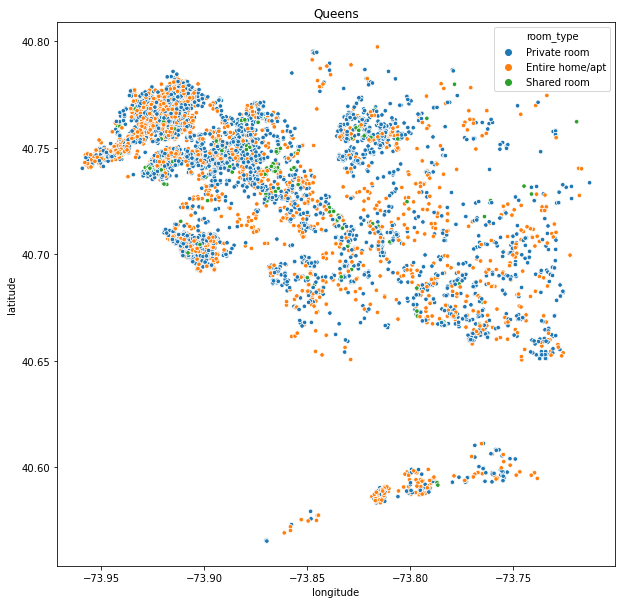

<Figure size 432x288 with 0 Axes>

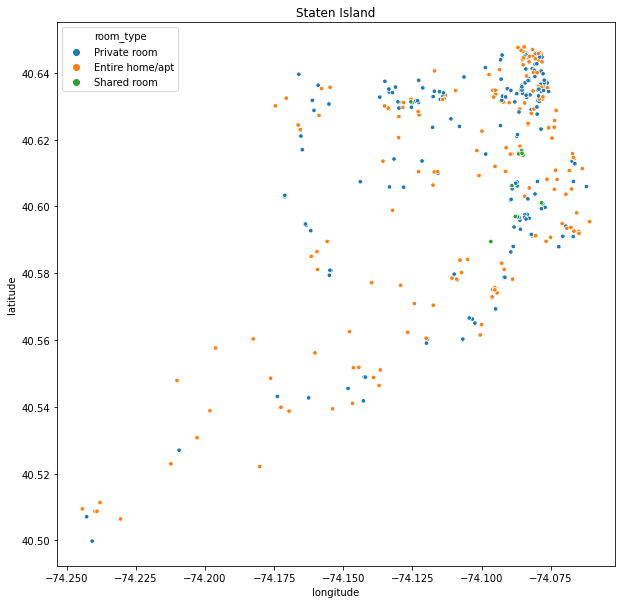

<Figure size 432x288 with 0 Axes>

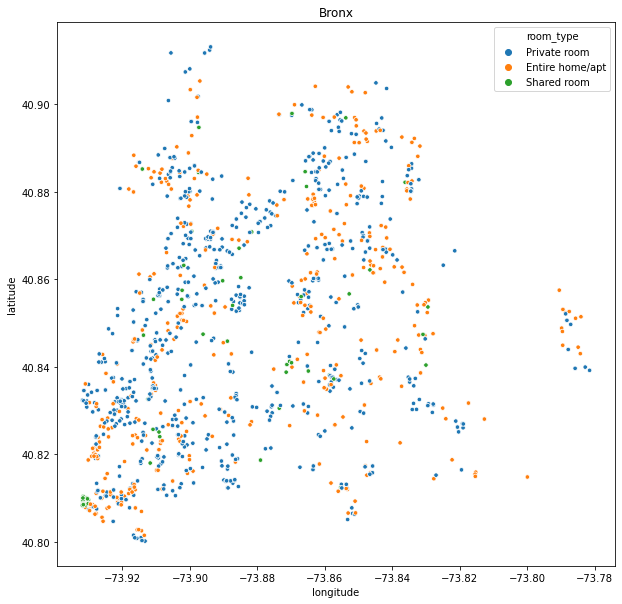

In [15]:
# Create dictionary subsetting the data based upon borough

output_boro = {b: df[df['neighbourhood_group'] == b] for b in boroughs}

# Plot for each borough highlighting different room types

for z in output_boro:
    plt.figure()
    size = (10,10)
    fig, ax = plt.subplots(figsize=size)
    sns.scatterplot(x='longitude', y='latitude', hue='room_type',s=20, data=output_boro[z])
    plt.title(z)
    
    